In [2]:
from neural_network import Network
from neural_network.layers import Dense, Reshape
from neural_network.activations import Sigmoid
from neural_network.losses import MSE

from keras.datasets import mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt
import numpy as np
import random

2022-09-21 00:49:01.435943: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-21 00:49:01.435989: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape and normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# encode output
y_train = np_utils.to_categorical(y_train)
y_train = y_train.reshape(len(y_train), 10, 1)

y_test = np_utils.to_categorical(y_test)
y_test = y_test.reshape(len(y_test), 10, 1)

In [4]:
network = Network(loss=MSE())
network.add_layers(
    Reshape((28, 28), (28*28, 1)),
    Dense(28*28, 100, activation=Sigmoid()),
    Dense(100, 50, activation=Sigmoid()),
    Dense(50, 10, activation=Sigmoid()),
)

In [5]:
network.fit(x_train[0:1000], y_train[0:1000], epochs=10, learning_rate=0.1, verbose=True)

epoch 1/10 loss=0.11748637583886126
epoch 2/10 loss=0.09517111777601901
epoch 3/10 loss=0.09271403744503416
epoch 4/10 loss=0.08627512095751222
epoch 5/10 loss=0.07626453646452808
epoch 6/10 loss=0.0648827539281599
epoch 7/10 loss=0.0545471153757421
epoch 8/10 loss=0.04723379071796331
epoch 9/10 loss=0.04198155834293168
epoch 10/10 loss=0.03823132373302722


In [6]:
tests = 1000
correct = 0

for _ in range(tests):
    test_index = random.randint(0, x_test.shape[0])
    test = x_test[test_index]

    output = network.predict(test)
    prediction = np.argmax(output, axis=0)

    true_output = np.argmax(y_test[test_index], axis=0)

    if prediction - true_output == 0:
        correct += 1

print(f"AVG: {correct / tests :.2%} from {tests} tests")

AVG: 66.90% from 1000 tests


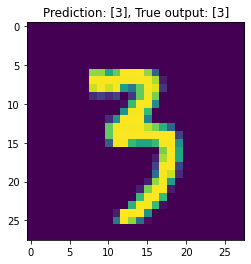

In [7]:
# pick a sample
sample = random.randint(0, x_test.shape[0])
image = x_test[sample]

# predict
output = network.predict(image)
prediction = np.argmax(output, axis=0)

# plot the sample
plt.title(label=f"Prediction: {prediction}, True output: {np.argmax(y_test[sample], axis=0)}")
plt.imshow(image)
plt.show()